In [23]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from sklearn.model_selection import KFold, cross_val_score
from statistics import mode
import json

In [24]:
df= pd.read_csv("Symptoms.csv")

In [25]:
len(df.Disease.unique())

134

In [26]:
df

,Disease,Count of Disease Occurrence,Symptom
0,hypertensive_disease,3363.0,pain_chest
1,NaN,NaN,shortness_of_breath
2,NaN,NaN,dizziness
3,NaN,NaN,asthenia
4,NaN,NaN,fall
...,...,...,...
1861,NaN,NaN,bedridden
1862,NaN,NaN,prostatism
1863,decubitus_ulcer,42.0,systolic_murmur
1864,NaN,NaN,frail


In [27]:
df['Disease'] = df['Disease'].fillna("hi")

In [28]:
d = list()
cur = 0
d.append(list())
for i in range(len(df)):
    if (type(df.iloc[i]["Disease"])!="hi"):
        d.append(list())
        cur+=1
    d[cur].append(df.iloc[i]["Symptom"])

In [29]:
d

[[],
 ['pain_chest'],
 ['shortness_of_breath'],
 ['dizziness'],
 ['asthenia'],
 ['fall'],
 ['syncope'],
 ['vertigo'],
 ['sweat'],
 ['palpitation'],
 ['nausea'],
 ['angina_pectoris'],
 ['pressure_chest'],
 ['polyuria'],
 ['polydypsia'],
 ['shortness_of_breath'],
 ['pain_chest'],
 ['asthenia'],
 ['nausea'],
 ['orthopnea'],
 ['rale'],
 ['sweat'],
 ['unresponsiveness'],
 ['mental_status_changes'],
 ['vertigo'],
 ['vomiting'],
 ['labored_breathing'],
 ['feeling_suicidal'],
 ['suicidal'],
 ['hallucinations_auditory'],
 ['feeling_hopeless'],
 ['weepiness'],
 ['sleeplessness'],
 ['motor_retardation'],
 ['irritable_mood'],
 ['blackout'],
 ['mood_depressed'],
 ['hallucinations_visual'],
 ['worry'],
 ['agitation'],
 ['tremor'],
 ['intoxication'],
 ['verbal_auditory_hallucinations'],
 ['energy_increased'],
 ['difficulty'],
 ['nightmare'],
 ['unable_to_concentrate'],
 ['homelessness'],
 ['pain_chest'],
 ['angina_pectoris'],
 ['shortness_of_breath'],
 ['hypokinesia'],
 ['sweat'],
 ['pressure_chest']

In [30]:
j = open("modifiedSymptoms.json")

In [31]:
s1 = json.load(j)

In [32]:
alld = pd.read_csv("all_diseases.csv")

In [33]:
s = alld["0"].to_list()

In [34]:
s.insert(0,"Symptoms")

In [35]:
df2 = pd.DataFrame(columns=s)

In [36]:
df2["Symptoms"] = pd.Series(list(s1.keys()))

In [37]:
df2

,Symptoms,pain_chest,shortness_of_breath,dizziness,asthenia,fall,syncope,vertigo,sweat,palpitation,...,feces_in_rectum,prodrome,hypoproteinemia,alcohol_binge_episode,abdomen_acute,air_fluid_level,catching_breath,large-for-dates_fetus,immobile,homicidal_thoughts
0,hypertensive_disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,depression_mental,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,coronary_arteriosclerosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,ileus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,adhesion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,delusion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,affect_labile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df2 = df2.set_index("Symptoms")

In [39]:
for j in list(s1.keys()):
    for i in alld["0"].to_list():
        if(i in s1[j]):
            df2.loc[j,i] = 1
        else:
            df2.loc[j,i] = 0

In [40]:
df2

,pain_chest,shortness_of_breath,dizziness,asthenia,fall,syncope,vertigo,sweat,palpitation,nausea,...,feces_in_rectum,prodrome,hypoproteinemia,alcohol_binge_episode,abdomen_acute,air_fluid_level,catching_breath,large-for-dates_fetus,immobile,homicidal_thoughts
Symptoms,,,,,,,,,,,,,,,,,,,,,
hypertensive_disease,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
diabetes,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
depression_mental,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
coronary_arteriosclerosis,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
pneumonia,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ileus,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
adhesion,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
delusion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df2.to_csv("FinalSymptoms.csv")

In [42]:
df1 = pd.read_csv("FinalSymptoms.csv")

In [43]:
l = []
for i in df1.columns:
    l.append(df1[i].sum())

In [44]:
l = l[1:]

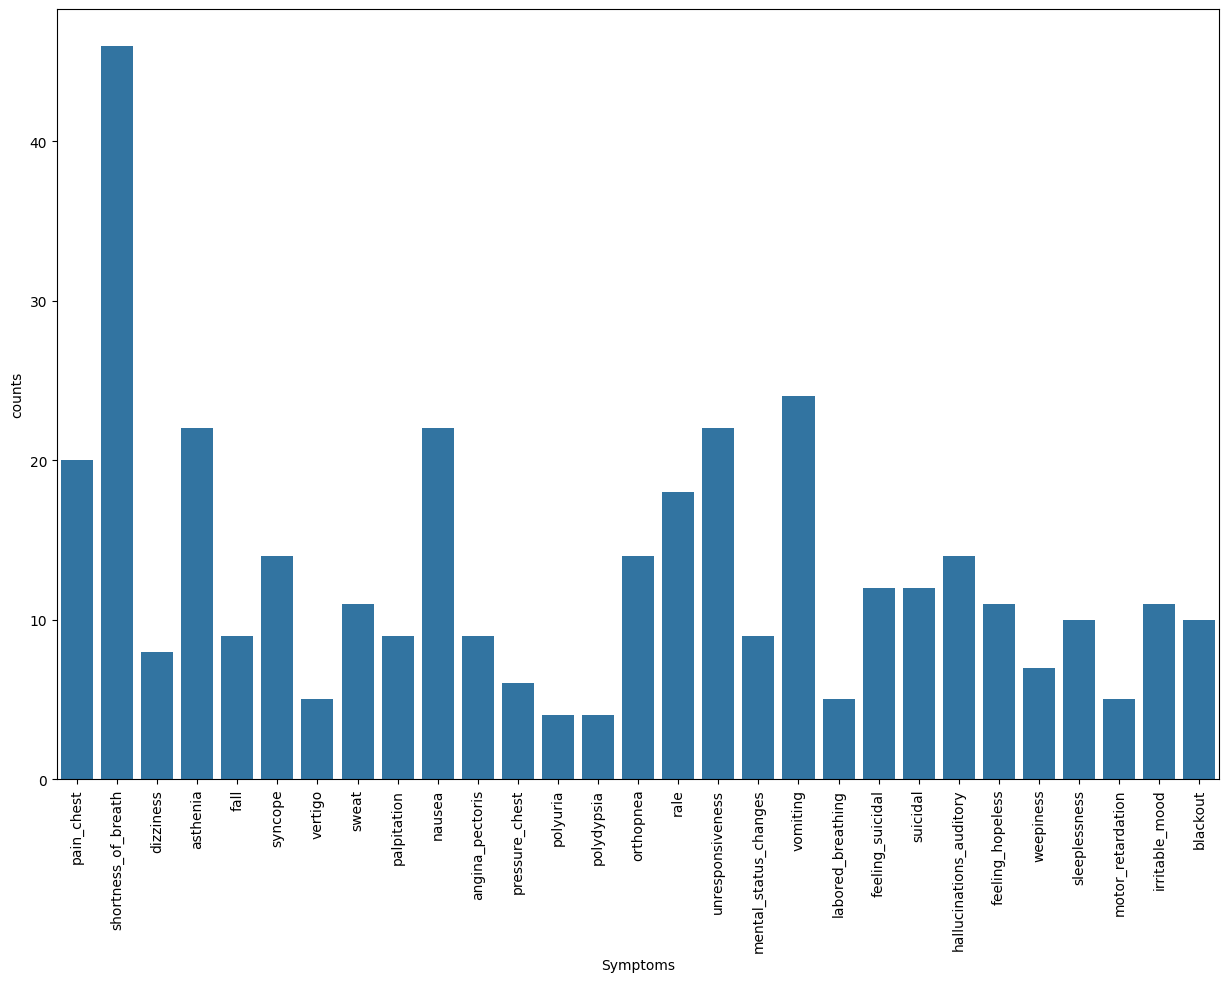

In [45]:
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
graph = pd.DataFrame({
    'Symptoms': df1.columns.to_list()[1:30],
    'counts':l[:29]
    }   
)
plt.figure(figsize=(15,10))
sns.barplot(x='Symptoms',y='counts',data=graph)
plt.xticks(rotation=90)
plt.show()

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [47]:
X = df1.drop("Symptoms",axis=1)
y = df1["Symptoms"]

In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2 = pd.DataFrame()
df2["Symtoms"] = df1['Symptoms']
df1['Symptoms'] = label_encoder.fit_transform(df1['Symptoms'])
df2["Encoded"] = df1['Symptoms']

In [51]:
df2

,Disease,Encoded
0,71,71
1,39,39
2,38,38
3,28,28
4,112,112
...,...,...
128,74,74
129,5,5
130,35,35
131,6,6


In [104]:
X = df1.drop("Symptoms",axis=1)
y = df1["Symptoms"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [106]:
def cv_scoring(estimator,x,y):
    return accuracy_score(y, estimator.predict(x))

models={
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18),
}

# bu aşamada puanlar üretilir

for model_name in models:
    model = models[model_name]
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # Düzenli KFold kullanımı
    scores = cross_val_score(model, X, y, cv=kfold, scoring=cv_scoring, n_jobs=-1)
    print("==" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean Score: 0.0
Gaussian NB
Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean Score: 0.0
Random Forest
Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean Score: 0.0


Accuracy on test data by SVM Classifier: 0.0


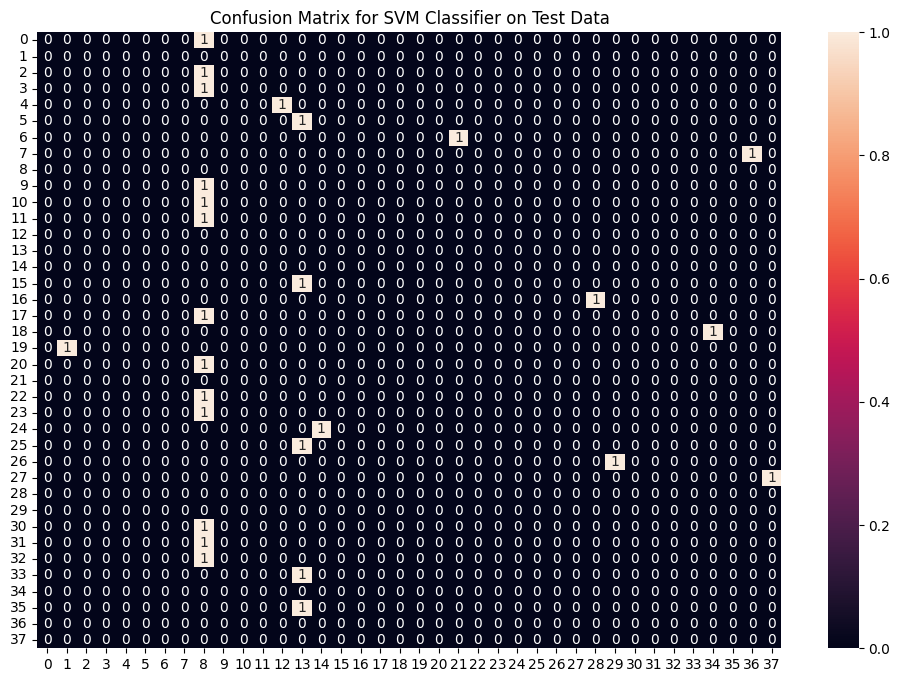

In [107]:
svmModel=SVC()
svmModel.fit(x_train,y_train)
preds=svmModel.predict(x_test)

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")


cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

Accuracy on train data by Naive Bayes Classifier: 100.0


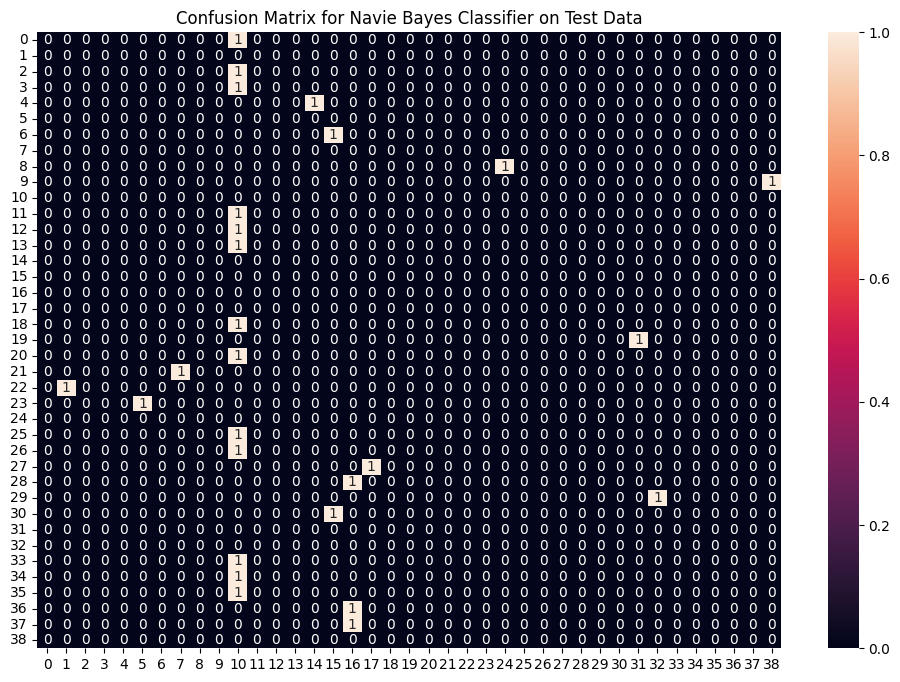

In [108]:

nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
nbModelPredict=nb_model.predict(x_test)

print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(x_train))*100}")

cf_matrix=confusion_matrix(y_test, nbModelPredict)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Navie Bayes Classifier on Test Data")
plt.show()

Accuracy on test data by Random Forest Classifier: 0.0


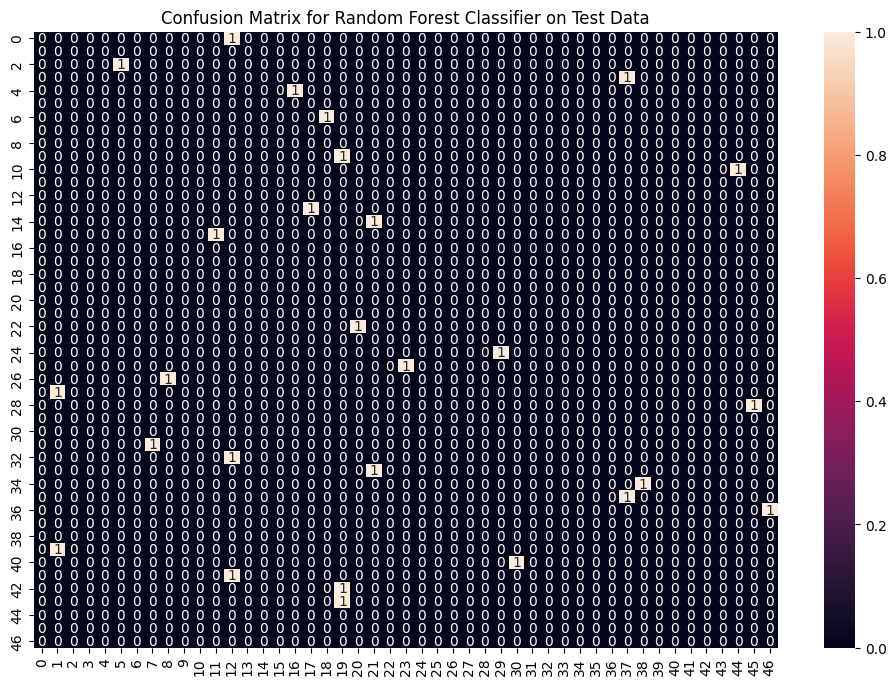

In [110]:
randomForestModel=RandomForestClassifier(random_state=18)
randomForestModel.fit(x_train,y_train)
randomForestModelPredict=randomForestModel.predict(x_test)

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix=confusion_matrix(y_test, randomForestModelPredict)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy on Test dataset by the combined model: 100.0


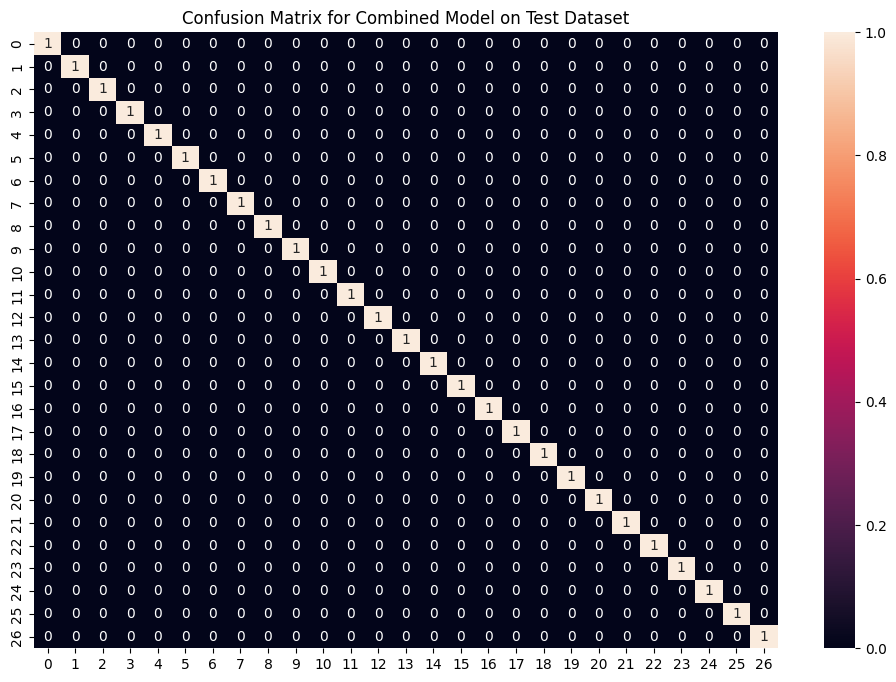

In [114]:

svmModelFit = SVC()
nbModelFit = GaussianNB()
rfModelFit = RandomForestClassifier(random_state=18)

svmModelFit.fit(X, y)
nbModelFit.fit(X, y)
rfModelFit.fit(X, y)

svmPredicts = svmModelFit.predict(x_test)
nbModelPredicts = nbModelFit.predict(x_test)
rfModelPredicts = rfModelFit.predict(x_test)

def safe_mode(lst):
    try:
        return mode(lst)
    except:
        return max(set(lst), key=lst.count)

final_preds = [safe_mode([i, j, k]) for i, j, k in zip(svmPredicts, nbModelPredicts, rfModelPredicts)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(y_test, final_preds) * 100}")

cf_matrix = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [128]:
symptoms = X.columns.values
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":label_encoder.classes_
}


def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
	input_data = np.array(input_data).reshape(1,-1)
	rf_prediction = data_dict["predictions_classes"][rfModelFit.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][nbModelFit.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][svmModelFit.predict(input_data)[0]]
	final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
	predictions = {
		"rf_model_prediction": rf_prediction,
		"naive_bayes_prediction": nb_prediction,
		"svm_model_prediction": svm_prediction,
		"final_prediction":final_prediction
	}
	return predictions
test_symptoms = "Hallucinations Auditory"
test_predictions = predictDisease(test_symptoms)
print(test_predictions)
warnings.filterwarnings("ignore", category=UserWarning)


{'rf_model_prediction': 'decubitus_ulcer', 'naive_bayes_prediction': 'decubitus_ulcer', 'svm_model_prediction': 'decubitus_ulcer', 'final_prediction': 'd'}


In [27]:
correlation_matrix = df1.corr()

In [28]:
correlation_matrix

,Symptoms,pain_chest,shortness_of_breath,dizziness,asthenia,fall,syncope,vertigo,sweat,palpitation,...,feces_in_rectum,prodrome,hypoproteinemia,alcohol_binge_episode,abdomen_acute,air_fluid_level,catching_breath,large-for-dates_fetus,immobile,homicidal_thoughts
Symptoms,1.000000,0.042188,0.068347,-0.095545,-0.111214,-0.015594,0.070833,0.102958,0.038394,-0.042103,...,-0.104285,-0.002267,0.090683,0.133757,0.018137,0.018137,0.018137,-0.138291,-0.138291,-0.070279
pain_chest,0.042188,1.000000,0.357450,0.070510,-0.017452,-0.029595,0.198412,0.138027,0.637371,0.472883,...,-0.036618,-0.036618,-0.036618,-0.036618,-0.036618,-0.036618,-0.036618,-0.036618,-0.036618,-0.036618
shortness_of_breath,0.068347,0.357450,1.000000,0.015496,0.016634,-0.070031,0.162657,0.022494,0.355560,0.181702,...,-0.063290,-0.063290,-0.063290,0.119700,-0.063290,-0.063290,-0.063290,0.119700,0.119700,-0.063290
dizziness,-0.095545,0.070510,0.015496,1.000000,0.227812,0.183641,0.119312,0.116250,0.153654,0.183641,...,-0.022019,-0.022019,-0.022019,-0.022019,-0.022019,-0.022019,-0.022019,-0.022019,-0.022019,-0.022019
asthenia,-0.111214,-0.017452,0.016634,0.227812,1.000000,0.202321,0.242933,0.337559,0.086726,0.041191,...,-0.038749,-0.038749,-0.038749,-0.038749,-0.038749,-0.038749,-0.038749,-0.038749,-0.038749,-0.038749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
air_fluid_level,0.018137,-0.036618,-0.063290,-0.022019,-0.038749,-0.023449,-0.029854,-0.017203,-0.026135,-0.023449,...,-0.007576,-0.007576,-0.007576,-0.007576,1.000000,1.000000,1.000000,-0.007576,-0.007576,-0.007576
catching_breath,0.018137,-0.036618,-0.063290,-0.022019,-0.038749,-0.023449,-0.029854,-0.017203,-0.026135,-0.023449,...,-0.007576,-0.007576,-0.007576,-0.007576,1.000000,1.000000,1.000000,-0.007576,-0.007576,-0.007576
large-for-dates_fetus,-0.138291,-0.036618,0.119700,-0.022019,-0.038749,-0.023449,-0.029854,-0.017203,-0.026135,-0.023449,...,-0.007576,-0.007576,-0.007576,-0.007576,-0.007576,-0.007576,-0.007576,1.000000,1.000000,-0.007576
immobile,-0.138291,-0.036618,0.119700,-0.022019,-0.038749,-0.023449,-0.029854,-0.017203,-0.026135,-0.023449,...,-0.007576,-0.007576,-0.007576,-0.007576,-0.007576,-0.007576,-0.007576,1.000000,1.000000,-0.007576


In [29]:
target_correlations = correlation_matrix['Symptoms'].sort_values(ascending=False)

In [30]:
target_correlations = target_correlations.dropna()

In [31]:
target_correlations.sum()

1.4277152404427689

In [32]:
imp_c =  list(target_correlations.index)
imp_c.remove("Symptoms")
imp_c

['polymyalgia',
 'bradycardia',
 'stool_color_yellow',
 'out_of_breath',
 'mediastinal_shift',
 'apyrexial',
 'hematuria',
 'hirsutism',
 'nasal_discharge_present',
 'noisy_respiration',
 'rapid_shallow_breathing',
 'barking_cough',
 'scar_tissue',
 'ambidexterity',
 'clumsiness',
 'rambling_speech',
 'rolling_of_eyes',
 'phonophobia',
 'room_spinning',
 'decreased_translucency',
 'hypertonicity',
 'monocytosis',
 'posterior_rhinorrhea',
 'withdraw',
 'alcohol_binge_episode',
 'gurgle',
 'paraparesis',
 'todd_paralysis',
 'alcoholic_withdrawal_symptoms',
 'snore',
 'sciatica',
 'frothy_sputum',
 'hemiplegia',
 'no_known_drug_allergies',
 'vision_blurred',
 'breakthrough_pain',
 'pain_abdominal',
 'hypersomnolence',
 'underweight',
 'lip_smacking',
 'snuffle',
 'bruit',
 't_wave_inverted',
 'stupor',
 'moody',
 'soft_tissue_swelling',
 'hepatomegaly',
 'tachypnea',
 'dyspnea',
 'vertigo',
 'angina_pectoris',
 'transsexual',
 'rest_pain',
 'urinary_hesitation',
 'chest_discomfort',
 'fat

In [33]:
from thefuzz import fuzz
from thefuzz import process

In [132]:
values = process.extract("cough pain abdominal fever feeling panic",imp_c,limit=len(target_correlations))

In [133]:
values

[('pain_abdominal', 90),
 ('barking_cough', 86),
 ('breakthrough_pain', 86),
 ('rest_pain', 86),
 ('pain_foot', 86),
 ('pain_neck', 86),
 ('shooting_pain', 86),
 ('pain_chest', 86),
 ('feeling_strange', 86),
 ('side_pain', 86),
 ('excruciating_pain', 86),
 ('pain_back', 86),
 ('heavy_feeling', 86),
 ('productive_cough', 86),
 ('colic_abdominal', 86),
 ('pain_in_lower_limb', 86),
 ('pleuritic_pain', 86),
 ('abdominal_bloating', 86),
 ('abdominal_tenderness', 86),
 ('low_back_pain', 86),
 ('non-productive_cough', 86),
 ('feeling_hopeless', 86),
 ('feeling_suicidal', 86),
 ('hacking_cough', 86),
 ('poor_feeding', 60),
 ('clonus', 60),
 ('cough', 60),
 ('fever', 60),
 ('pain', 60),
 ('panic', 60),
 ('abdomen_acute', 59),
 ('fear_of_falling', 57),
 ('abortion', 57),
 ('wheezing', 56),
 ('swelling', 56),
 ('flushing', 56),
 ('blanch', 54),
 ('coordination_abnormal', 53),
 ('anosmia', 53),
 ('feels_hot/feverish', 52),
 ('bleeding_of_vagina', 52),
 ('homicidal_thoughts', 52),
 ('elation', 51),

In [134]:
df = pd.DataFrame(columns=target_correlations.index)
df.loc[0] = np.zeros(len(target_correlations))
for i  in values:
    if(i[1]>85):
        df.loc[0][i[0]] = 1

In [135]:
S = pd.DataFrame(columns=["Symptom","Relation"])
for i in range(len(df1)):
    S.loc[len(S)] = [df2.iloc[df2.index[df2['Encoded'] == df1.loc[i]["Symptoms"]]]["Symtoms"][i],df.corrwith(df1.iloc[i], axis=1)[0]]

In [136]:
S.sort_values("Relation",ascending=False)

,Symptom,Relation
20,acquired_immuno-deficiency_syndrome,0.092533
81,Pneumocystis_carinii_pneumonia,0.091535
7,asthma,0.033154
19,anxiety_state,0.024169
89,candidiasis,0.014409
...,...,...
41,benign_prostatic_hypertrophy,-0.021120
16,confusion,-0.022002
44,arthritis,-0.024453
6,accident_cerebrovascular,-0.037240
